# LDA
A common linear model in EEG analysis is Linear Discriminant Analysis (LDA). The model can be imported and used from Scikitlearn. A list of four features as related to a participant's sex are imported. This notebook is a reference on the usage of the LDA model on python

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
data = pd.read_csv("ex/features.csv")
data.head()

,sex,amp,peak,n170,de
0,f,3.976976,1.396650,3.518662,-4.641687
1,f,2.838296,-2.903568,-1.997229,-4.701930
2,f,-1.428451,-2.606083,0.109957,-4.652843
3,f,-3.363337,3.906902,7.463065,-4.681531
4,f,0.229698,0.727408,2.955038,-4.733215


<AxesSubplot:xlabel='n170', ylabel='de'>

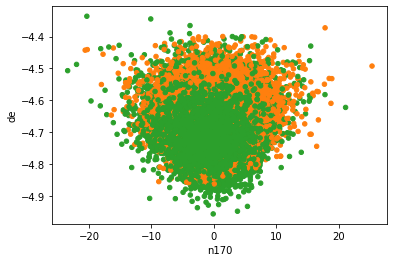

In [3]:
data["color"] = (data["sex"] == "f").apply(lambda x: "C1" if x else "C2")
data.plot.scatter("n170", "de", c="color")

The features don't seem to be linearly separable, so a high accuracy is not expected.

This scikit-learn model expects a features matrix and a labels vector.

In [4]:
X = data[["amp", "peak", "n170", "de"]]
Y = data[["sex"]] == "f"
print(X.shape, Y.shape)

(21604, 4) (21604, 1)


A 70/30 split is done for testing and training purposes. This evaluates the model's generalizability.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

The model is created by instanciating the LDA class

In [6]:
model = LDA()

And must be trained by calling the `fit` function with the train features and labels

In [7]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

An accuracy score can be provided by calling the `score` function.

In [8]:
model.score(X_train, y_train)

0.5978045232112155

The accuracy above is the training accuracy. For generizability, the test accuracy is always reported:

In [9]:
model.score(X_test, y_test)

0.5978093181116939

A small difference between the test and train accuracies means the model will score similarly on unseen data. In this case, that's not so relevant, since the accuracy is only slightly above chance level.

The model's coeficients (or weights) indicate the relevance of each feature for predicting the label.

In [10]:
model.coef_

array([[ 0.02038725, -0.04903125,  0.10061257,  5.53390321]])

In this case, Differential Entropy in Frontal ROI seems to be the best feature for classifying sex from the four selected features.